## Final project

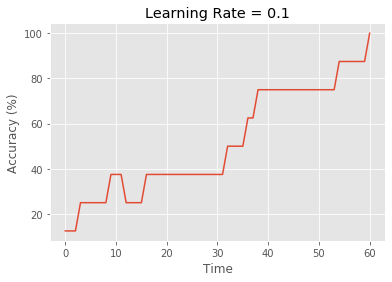

In [1]:
from Function import Neural_Network
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
# proof neural network
NN = Neural_Network(8, 8, 8)
input = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 1]])

output = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 1]]).T

NN.training(input, output, input, output, 0.1, 100)
plt.style.use('ggplot')
plt.plot(NN.accuracy_history)
plt.title('Learning Rate = 0.1')
plt.ylabel('Accuracy (%)')
plt.xlabel('Time')
plt.show()

In [2]:
def createArray(file, size):
    image = Image.open(file)
    data = np.array(image).flatten()
    #data = np.where(data == 0, data, 1)
    output = np.zeros(size)
    output[i] = .9
    return data, output

In [3]:
# https://www.kaggle.com/jidhumohan/mnist-png ==> dataset

testdir = 'mnist_png/testing/'
trainingdir = 'mnist_png/training/'
training_input = list()
training_output = list()
test_input = list()
test_output = list()
size = 4
max = 5000
for i in range(size):
    train_directories = os.listdir(trainingdir+str(i))
    test_directories = os.listdir(testdir+str(i))
    id = 0
    for file in train_directories:
        data, output = createArray(trainingdir+str(i)+"/"+file, size)
        training_input.append(data)
        training_output.append(output)
        
    for file in test_directories:
        data, output = createArray(testdir+str(i)+"/"+file, size)
        test_input.append(data)
        test_output.append(output)



In [5]:
NN = Neural_Network(28*28, 100, size)
NN.training(np.array(training_input), np.array(training_output), test_input, test_output, 1, 100)

#NN.training(np.array(training_input), np.array(training_output), test_input, test_output, .2, 50)

plt.style.use('ggplot')
plt.plot(NN.accuracy_history)
plt.title('Evolution of the accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Iteration')
plt.show()

/home/ec2-user/FDS-Project/Function.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
